# Set up notebook with key functions

In [ ]:
# Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import copy
import pandas as pd
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Function for producing differenced image at RGB color channels

def img_diff(orig_image, new_image):
    # Convert images to grayscale
    imageA = copy.deepcopy(orig_image)
    imageB = copy.deepcopy(new_image)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Display image differences
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(imageA)
    axarr[0,1].imshow(imageB)
    axarr[1,0].imshow(diff)
    axarr[1,1].imshow(thresh)

    # Return the differenced threshold image
    return thresh

In [3]:
# Create function to crop center of image 
def crop_image_center(img, rows, cols):
    
    # Find starting coordinates of top left corner of center crop
    start_row = (img.shape[0] - rows) // 2
    start_col = (img.shape[1] - cols) // 2
    
    new_image = copy.deepcopy(img[start_row:start_row+rows, start_col:start_col+cols, :])
    
    return new_image

In [4]:
# Create function for HOG features

def get_hog(image_set, orient_count, pix_per_cell):
    
    # Initialize list for features and sample images
    feat_list = []
    total_img_count = len(image_set)
  
    # Iterate over images, get HOG features, then stack feature values together
    for z in range(total_img_count):
        orig_im = copy.deepcopy(image_set[z])
        fd, hog_image = hog(orig_im, orientations=orient_count,
                            pixels_per_cell=(pix_per_cell, pix_per_cell), 
                            cells_per_block=(2, 2), visualize=True, multichannel=False)
        feat_list.append(fd[np.newaxis, :])
        
    total_hog = np.vstack(feat_list)
        
    return total_hog

# Create function to calculate classification accuracy
def get_accuracy(predicted, actual):
    correct_count = 0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct_count += 1
    return float(correct_count) / len(predicted)

# Set up Model with aVH images only

In [5]:
# Load images
img_names4 = ['Sinabung_2019-08-10_261080_22365_aVH.png',
              'Sinabung_2019-08-17_261080_22365_aVH.png','Sinabung_2019-08-24_261080_22365_aVH.png',
              'Sinabung_2019-08-31_261080_22365_aVH.png','Sinabung_2019-09-07_261080_22365_aVH.png',
              'Sinabung_2019-09-14_261080_22365_aVH.png','Sinabung_2019-09-21_261080_22365_aVH.png',
              'Sinabung_2019-09-28_261080_22365_aVH.png','Sinabung_2019-10-05_261080_22365_aVH.png',
              'Sinabung_2019-10-12_261080_22365_aVH.png','Sinabung_2019-10-19_261080_22365_aVH.png',
              'Sinabung_2020-08-08_261080_22365_aVH.png',
              'Sinabung_2020-08-15_261080_22365_aVH.png','Sinabung_2020-08-22_261080_22365_aVH.png',
              'Sinabung_2020-08-29_261080_22365_aVH.png','Sinabung_2020-09-05_261080_22365_aVH.png',
              'Sinabung_2020-09-12_261080_22365_aVH.png','Sinabung_2020-09-19_261080_22365_aVH.png',
              'Sinabung_2020-09-26_261080_22365_aVH.png','Sinabung_2020-10-03_261080_22365_aVH.png',
              'Sinabung_2020-10-10_261080_22365_aVH.png','Sinabung_2020-10-17_261080_22365_aVH.png']

img_list4 = []
for image in img_names4:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list4.append(new_img)

In [6]:
# Find minimum rows and columns across images
r_list = []
c_list = []

for i in range(len(img_list4)):
    r_list.append(img_list4[i].shape[0])
    c_list.append(img_list4[i].shape[1])

min_rows = min(r_list)
min_cols = min(c_list)
print(min_rows)
print(min_cols)
print(max(r_list))
print(max(c_list))

846
867
846
867


In [7]:
# Crop images to get exact same dimensions across dataset
new_im0x = crop_image_center(img_list4[0], 750, 750)
new_im1x = crop_image_center(img_list4[1], 750, 750)
new_im2x = crop_image_center(img_list4[2], 750, 750)
new_im3x = crop_image_center(img_list4[3], 750, 750)
new_im4x = crop_image_center(img_list4[4], 750, 750)
new_im5x = crop_image_center(img_list4[5], 750, 750)
new_im6x = crop_image_center(img_list4[6], 750, 750)
new_im7x = crop_image_center(img_list4[7], 750, 750)
new_im8x = crop_image_center(img_list4[8], 750, 750)
new_im9x = crop_image_center(img_list4[9], 750, 750)
new_im10x = crop_image_center(img_list4[10], 750, 750)
new_im11x = crop_image_center(img_list4[11], 750, 750)
new_im12x = crop_image_center(img_list4[12], 750, 750)
new_im13x = crop_image_center(img_list4[13], 750, 750)
new_im14x = crop_image_center(img_list4[14], 750, 750)
new_im15x = crop_image_center(img_list4[15], 750, 750)
new_im16x = crop_image_center(img_list4[16], 750, 750)
new_im17x = crop_image_center(img_list4[17], 750, 750)
new_im18x = crop_image_center(img_list4[18], 750, 750)
new_im19x = crop_image_center(img_list4[19], 750, 750)
new_im20x = crop_image_center(img_list4[20], 750, 750)
new_im21x = crop_image_center(img_list4[21], 750, 750)

# See what differenced aVH images look like

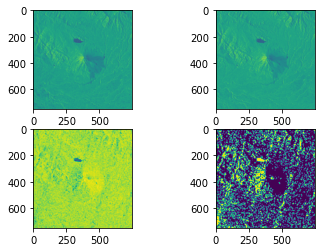

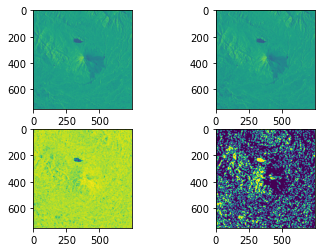

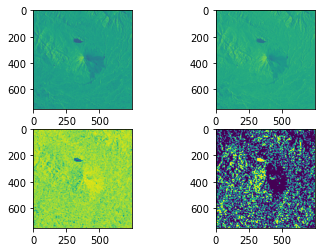

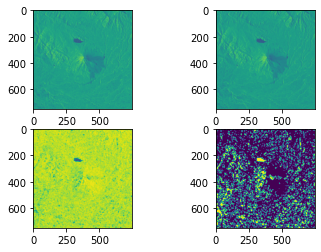

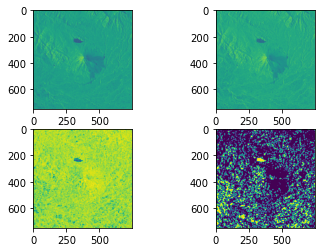

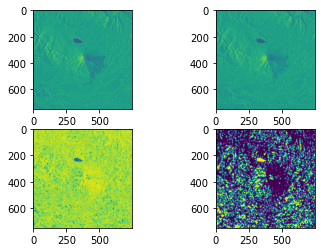

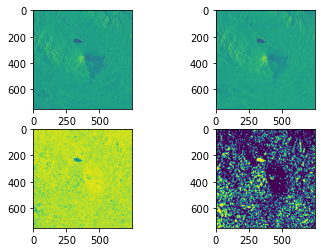

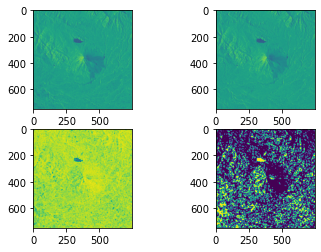

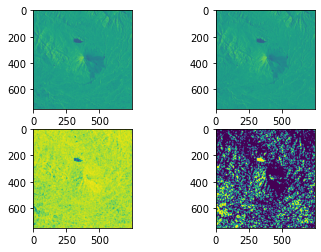

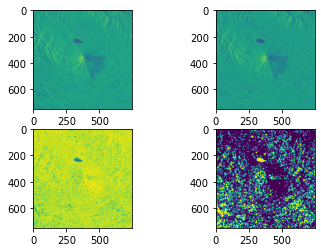

In [8]:
# Apply the image differencing function
diff_img1x = img_diff(new_im0x, new_im1x)
diff_img2x = img_diff(new_im0x, new_im2x)
diff_img3x = img_diff(new_im0x, new_im3x)
diff_img4x = img_diff(new_im0x, new_im4x)
diff_img5x = img_diff(new_im0x, new_im5x)
diff_img6x = img_diff(new_im0x, new_im6x)
diff_img7x = img_diff(new_im0x, new_im7x)
diff_img8x = img_diff(new_im0x, new_im8x)
diff_img9x = img_diff(new_im0x, new_im9x)
diff_img10x = img_diff(new_im0x, new_im10x)

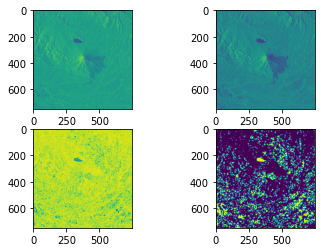

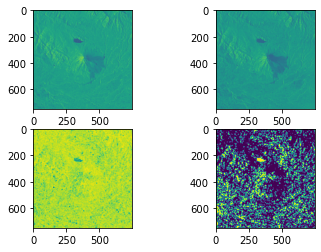

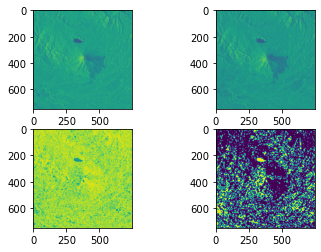

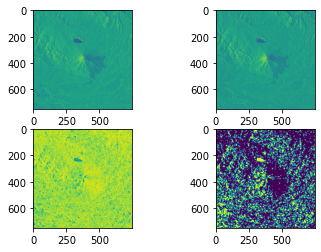

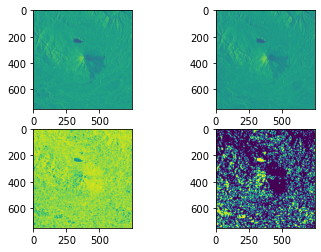

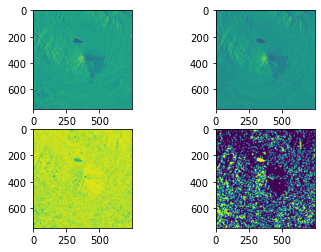

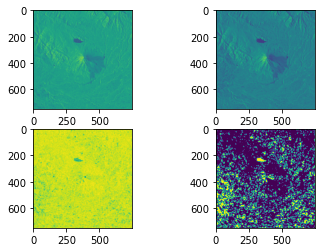

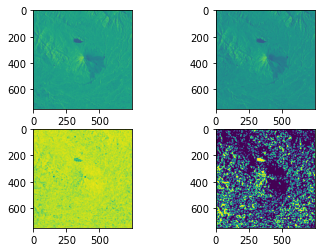

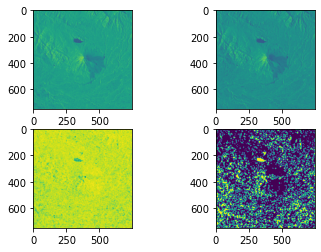

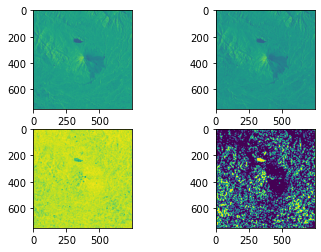

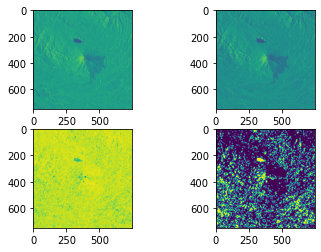

In [9]:
# Apply the image differencing function
diff_img11x = img_diff(new_im0x, new_im11x)
diff_img12x = img_diff(new_im0x, new_im12x)
diff_img13x = img_diff(new_im0x, new_im13x)
diff_img14x = img_diff(new_im0x, new_im14x)
diff_img15x = img_diff(new_im0x, new_im15x)
diff_img16x = img_diff(new_im0x, new_im16x)
diff_img17x = img_diff(new_im0x, new_im17x)
diff_img18x = img_diff(new_im0x, new_im18x)
diff_img19x = img_diff(new_im0x, new_im19x)
diff_img20x = img_diff(new_im0x, new_im20x)
diff_img21x = img_diff(new_im0x, new_im21x)

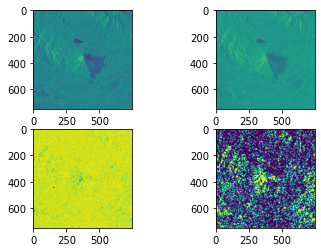

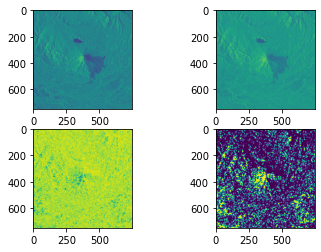

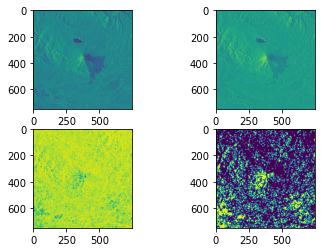

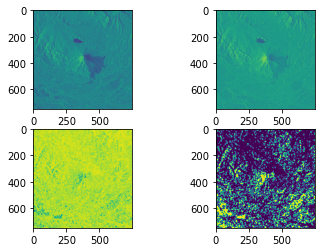

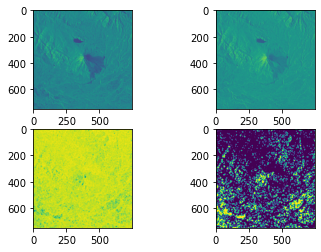

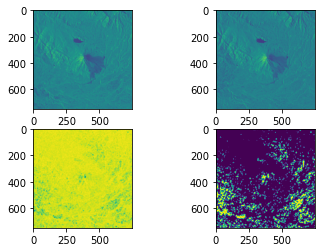

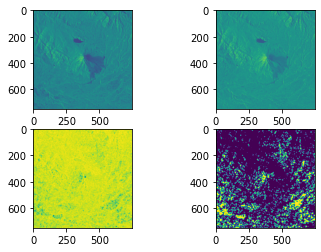

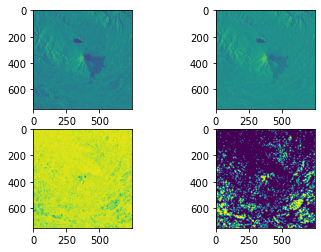

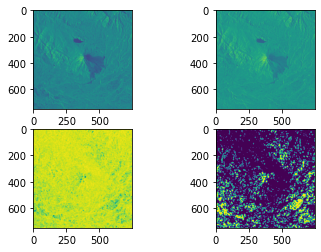

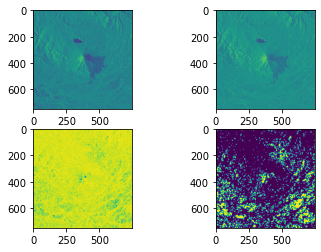

In [10]:
# Apply the image differencing function
diff_img12y = img_diff(new_im11x, new_im12x)
diff_img13y = img_diff(new_im11x, new_im13x)
diff_img14y = img_diff(new_im11x, new_im14x)
diff_img15y = img_diff(new_im11x, new_im15x)
diff_img16y = img_diff(new_im11x, new_im16x)
diff_img17y = img_diff(new_im11x, new_im17x)
diff_img18y = img_diff(new_im11x, new_im18x)
diff_img19y = img_diff(new_im11x, new_im19x)
diff_img20y = img_diff(new_im11x, new_im20x)
diff_img21y = img_diff(new_im11x, new_im21x)

# Bounding Boxes for aVH images using difference of difference method

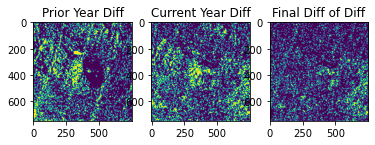

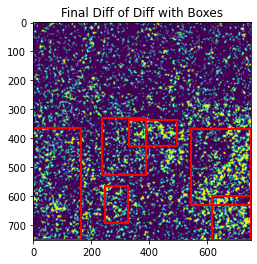

In [11]:
# Show difference of difference images
diffdiff1 = copy.deepcopy(diff_img12y - diff_img1x)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(diff_img1x)
axarr[0].title.set_text('Prior Year Diff')
axarr[1].imshow(diff_img12y)
axarr[1].title.set_text('Current Year Diff')
axarr[2].imshow(diffdiff1)
axarr[2].title.set_text('Final Diff of Diff')

# Find contours of key areas of change
cnts = cv2.findContours(diffdiff1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=800)[0]

# Create figure and axes for bounding boxes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(diffdiff1)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.title("Final Diff of Diff with Boxes")
plt.show()

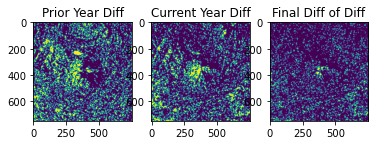

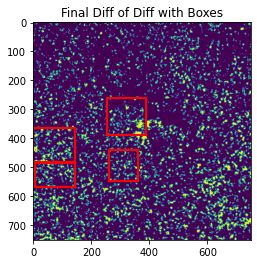

In [12]:
# Show difference of difference images
diffdiff2 = copy.deepcopy(diff_img13y - diff_img2x)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(diff_img2x)
axarr[0].title.set_text('Prior Year Diff')
axarr[1].imshow(diff_img13y)
axarr[1].title.set_text('Current Year Diff')
axarr[2].imshow(diffdiff2)
axarr[2].title.set_text('Final Diff of Diff')

# Find contours of key areas of change
cnts = cv2.findContours(diffdiff2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=800)[0]

# Create figure and axes for bounding boxes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(diffdiff2)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.title("Final Diff of Diff with Boxes")
plt.show()

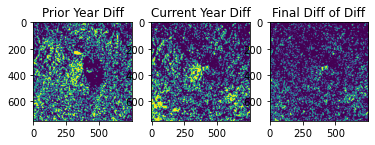

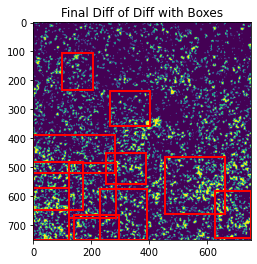

In [13]:
# Show difference of difference images
diffdiff3 = copy.deepcopy(diff_img14y - diff_img3x)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(diff_img3x)
axarr[0].title.set_text('Prior Year Diff')
axarr[1].imshow(diff_img14y)
axarr[1].title.set_text('Current Year Diff')
axarr[2].imshow(diffdiff3)
axarr[2].title.set_text('Final Diff of Diff')

# Find contours of key areas of change
cnts = cv2.findContours(diffdiff3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=800)[0]

# Create figure and axes for bounding boxes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(diffdiff3)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.title("Final Diff of Diff with Boxes")
plt.show()

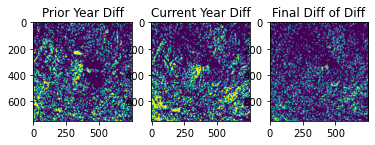

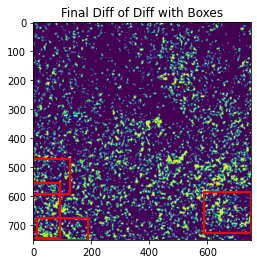

In [14]:
# Show difference of difference images
diffdiff4 = copy.deepcopy(diff_img15y - diff_img4x)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(diff_img4x)
axarr[0].title.set_text('Prior Year Diff')
axarr[1].imshow(diff_img15y)
axarr[1].title.set_text('Current Year Diff')
axarr[2].imshow(diffdiff4)
axarr[2].title.set_text('Final Diff of Diff')

# Find contours of key areas of change
cnts = cv2.findContours(diffdiff4.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=800)[0]

# Create figure and axes for bounding boxes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(diffdiff4)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.title("Final Diff of Diff with Boxes")
plt.show()

# Attempt modeling of aVH images using HOG

In [15]:
# Create image labels and list of differenced images
img_labels4 = [0,0,0,0,0,1,1,1,1,1,1,
               0,0,0,0,0,1,1,1,1,1]

diff_img_list4 = [diff_img1x, diff_img2x, diff_img3x, diff_img4x, diff_img5x,
                 diff_img11x, diff_img12x, diff_img13x, diff_img14x, diff_img15x, diff_img16x, 
                 diff_img6x, diff_img7x, diff_img8x, diff_img9x, diff_img10x, 
                 diff_img17x, diff_img18x, diff_img19x, diff_img20x, diff_img21x]

# Get HOG features using the best parameters previously found: 4 for orientations and 10 for pixels per cell
hog_feat4 = get_hog(diff_img_list4, 4, 10)

# Get top 8 features for HOG using PCA
pca_hog4 = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(hog_feat4)
X_pca_hog4 = pca_hog4.transform(hog_feat4)

# Check dimensions of top 8 features for HOG after PCA
print(X_pca_hog4.shape)
print(" ")

# Convert training set and test set labels and features to numpy arrays
y_train = np.array(img_labels4[:11])
y_test = np.array(img_labels4[11:])

X_train = X_pca_hog4[:11, :]
X_test = X_pca_hog4[11:, :]

# Normalize feature values using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit RF model
rf1 = RandomForestClassifier(max_depth=3, random_state=7).fit(X_train, y_train)

# Get predictions on training set and calculate classification accuracy
y_predict7 = rf1.predict(X_train)
print("RF model training set accuracy is: ")
print(get_accuracy(y_predict7, y_train))

# Get predictions on validation set and calculate classification accuracy
y_predict8 = rf1.predict(X_test)
print("RF model test set accuracy is: ")
print(get_accuracy(y_predict8, y_test))

# Print classification report
print(" ")
print("RF Model Classification Report")
print(classification_report(y_test, y_predict8))

print(" ")
print("Predicted:")
print(y_predict8)
print("Actual:")
print(y_test)
print(" ")

# Fit SVM model
svm1 = SVC(C=3, kernel='rbf').fit(X_train, y_train)

# Get predictions on training set and calculate classification accuracy
y_predict2 = svm1.predict(X_train)
print("SVM model training set accuracy is: ")
print(get_accuracy(y_predict2, y_train))

# Get predictions on validation set and calculate classification accuracy
y_predict3 = svm1.predict(X_test)
print("SVM model test set accuracy is: ")
print(get_accuracy(y_predict3, y_test))

# Print classification report
print(" ")
print("SVM Model Classification Report")
print(classification_report(y_test, y_predict3))

print(" ")
print("Predicted:")
print(y_predict3)
print("Actual:")
print(y_test)

(21, 8)
 
RF model training set accuracy is: 
1.0
RF model test set accuracy is: 
0.8
 
RF Model Classification Report
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

 
Predicted:
[0 0 0 1 1 1 1 1 1 1]
Actual:
[0 0 0 0 0 1 1 1 1 1]
 
SVM model training set accuracy is: 
1.0
SVM model test set accuracy is: 
0.5
 
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.50      0.60      0.55         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10

 
Predicted:
[0 0 1 1 1 1 1 0 0 1]
Actual:
[0 0 

# Set up Model with dVH images only

In [17]:
# Load images
img_names5 = ['Sinabung_2019-08-10_261080_22365_dVH.png',
              'Sinabung_2019-08-17_261080_22365_dVH.png','Sinabung_2019-08-24_261080_22365_dVH.png',
              'Sinabung_2019-08-31_261080_22365_dVH.png','Sinabung_2019-09-07_261080_22365_dVH.png',
              'Sinabung_2019-09-14_261080_22365_dVH.png','Sinabung_2019-09-21_261080_22365_dVH.png',
              'Sinabung_2019-09-28_261080_22365_dVH.png','Sinabung_2019-10-05_261080_22365_dVH.png',
              'Sinabung_2019-10-12_261080_22365_dVH.png',
              'Sinabung_2020-08-08_261080_22365_dVH.png',
              'Sinabung_2020-08-15_261080_22365_dVH.png',
              'Sinabung_2020-08-29_261080_22365_dVH.png',
              'Sinabung_2020-09-12_261080_22365_dVH.png','Sinabung_2020-09-19_261080_22365_dVH.png',
              'Sinabung_2020-10-03_261080_22365_dVH.png',
              'Sinabung_2020-10-17_261080_22365_dVH.png']

img_list5 = []
for image in img_names5:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list5.append(new_img)

# Find minimum rows and columns across images
r_list = []
c_list = []

for i in range(len(img_list4)):
    r_list.append(img_list4[i].shape[0])
    c_list.append(img_list4[i].shape[1])

min_rows = min(r_list)
min_cols = min(c_list)
print(min_rows)
print(min_cols)
print(max(r_list))
print(max(c_list))

846
867
846
867


In [19]:
# Crop images to get exact same dimensions across dataset
new_bef0 = crop_image_center(img_list4[0], 750, 750)
new_bef1 = crop_image_center(img_list4[1], 750, 750)
new_bef2 = crop_image_center(img_list4[2], 750, 750)
new_bef3 = crop_image_center(img_list4[3], 750, 750)
new_bef4 = crop_image_center(img_list4[4], 750, 750)
new_bef5 = crop_image_center(img_list4[5], 750, 750)
new_bef6 = crop_image_center(img_list4[6], 750, 750)
new_bef7 = crop_image_center(img_list4[7], 750, 750)
new_bef8 = crop_image_center(img_list4[8], 750, 750)
new_bef9 = crop_image_center(img_list4[9], 750, 750)

new_bef0a = crop_image_center(img_list4[10], 750, 750)
new_bef1a = crop_image_center(img_list4[11], 750, 750)
new_bef3a = crop_image_center(img_list4[12], 750, 750)
new_bef5a = crop_image_center(img_list4[13], 750, 750)
new_bef6a = crop_image_center(img_list4[14], 750, 750)
new_bef8a = crop_image_center(img_list4[15], 750, 750)
new_bef9a = crop_image_center(img_list4[16], 750, 750)


# See what differenced dVH images look like

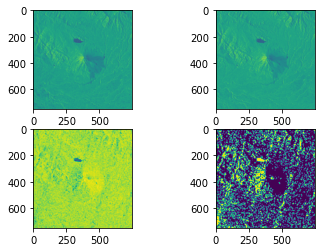

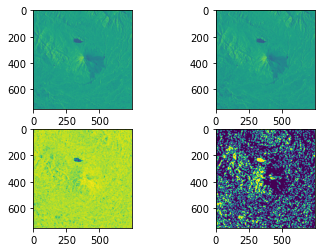

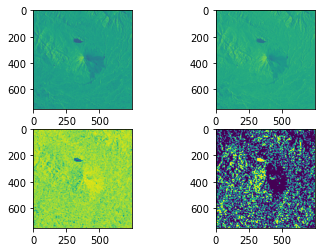

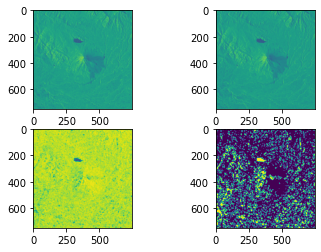

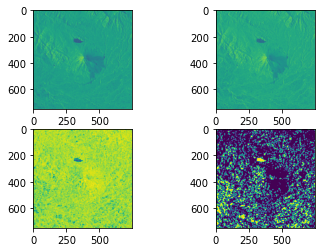

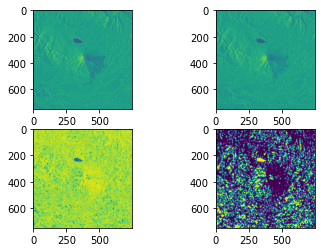

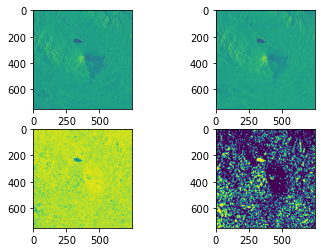

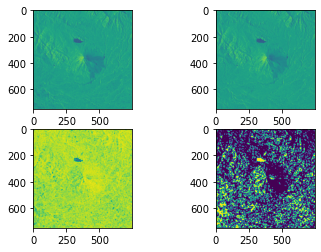

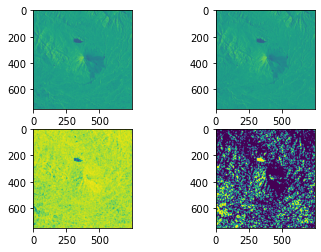

In [20]:
# Apply the image differencing function
diff_sd1 = img_diff(new_bef0, new_bef1)
diff_sd2 = img_diff(new_bef0, new_bef2)
diff_sd3 = img_diff(new_bef0, new_bef3)
diff_sd4 = img_diff(new_bef0, new_bef4)
diff_sd5 = img_diff(new_bef0, new_bef5)
diff_sd6 = img_diff(new_bef0, new_bef6)
diff_sd7 = img_diff(new_bef0, new_bef7)
diff_sd8 = img_diff(new_bef0, new_bef8)
diff_sd9 = img_diff(new_bef0, new_bef9)

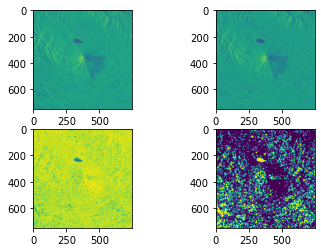

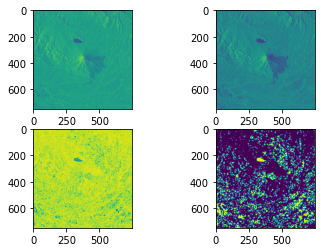

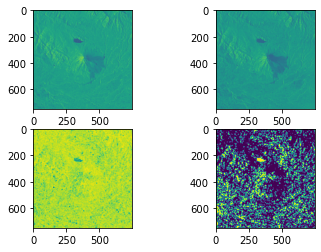

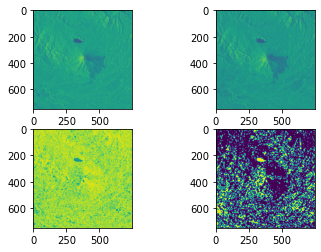

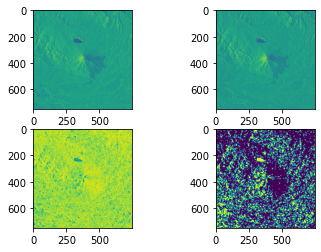

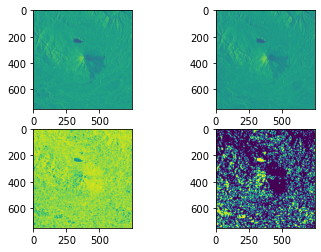

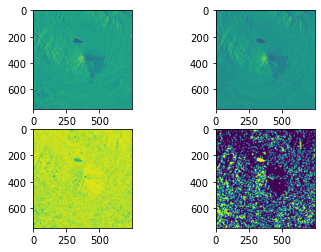

In [21]:
# Apply the image differencing function
diff_sd1a = img_diff(new_bef0, new_bef0a)
diff_sd2a = img_diff(new_bef0, new_bef1a)
diff_sd3a = img_diff(new_bef0, new_bef3a)
diff_sd4a = img_diff(new_bef0, new_bef5a)
diff_sd5a = img_diff(new_bef0, new_bef6a)
diff_sd6a = img_diff(new_bef0, new_bef8a)
diff_sd7a = img_diff(new_bef0, new_bef9a)

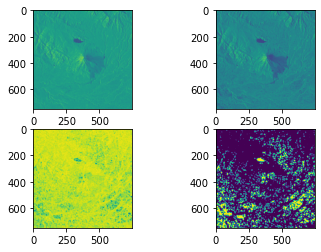

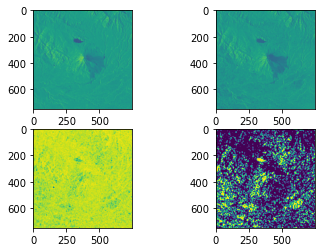

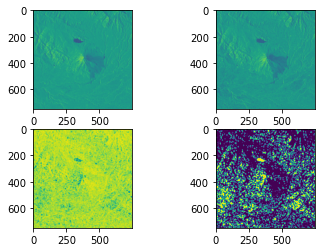

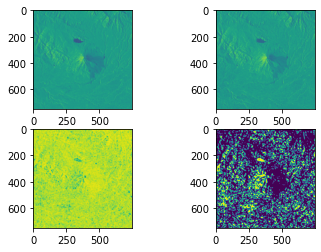

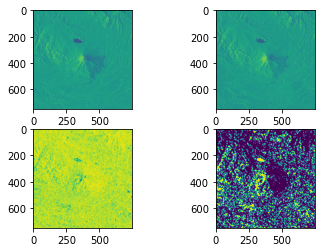

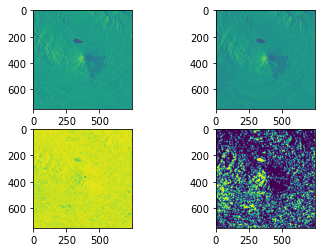

In [23]:
# Apply the image differencing function
diff_sd1y = img_diff(new_bef0a, new_bef1a)
diff_sd3y = img_diff(new_bef0a, new_bef3a)
diff_sd5y = img_diff(new_bef0a, new_bef5a)
diff_sd6y = img_diff(new_bef0a, new_bef6a)
diff_sd8y = img_diff(new_bef0a, new_bef8a)
diff_sd9y = img_diff(new_bef0a, new_bef9a)

# Bounding boxes using difference of difference method on dVH images

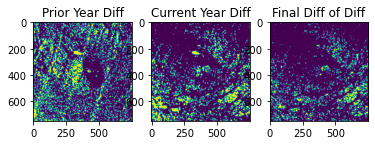

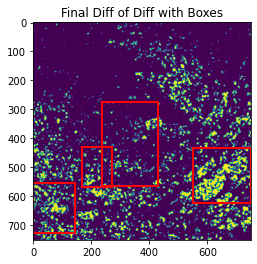

In [24]:
# Show difference of difference images
diffdiff1z = copy.deepcopy(diff_sd1y - diff_sd1)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(diff_sd1)
axarr[0].title.set_text('Prior Year Diff')
axarr[1].imshow(diff_sd1y)
axarr[1].title.set_text('Current Year Diff')
axarr[2].imshow(diffdiff1z)
axarr[2].title.set_text('Final Diff of Diff')

# Find contours of key areas of change
cnts = cv2.findContours(diffdiff1z.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=800)[0]

# Create figure and axes for bounding boxes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(diffdiff1z)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.title("Final Diff of Diff with Boxes")
plt.show()

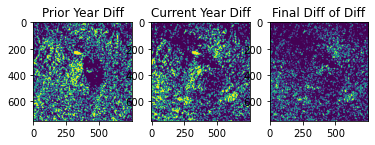

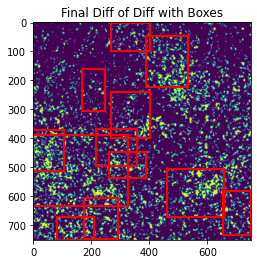

In [25]:
# Show difference of difference images
diffdiff3z = copy.deepcopy(diff_sd3y - diff_sd3)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(diff_sd3)
axarr[0].title.set_text('Prior Year Diff')
axarr[1].imshow(diff_sd3y)
axarr[1].title.set_text('Current Year Diff')
axarr[2].imshow(diffdiff3z)
axarr[2].title.set_text('Final Diff of Diff')

# Find contours of key areas of change
cnts = cv2.findContours(diffdiff3z.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=800)[0]

# Create figure and axes for bounding boxes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(diffdiff3z)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.title("Final Diff of Diff with Boxes")
plt.show()

# Attempt models on dVH images using HOG method

In [22]:
# Create image labels and list of differenced images
img_labels5 = [0,0,0,0,0,1,1,1,1,
               0,0,0,0,1,1,1]

diff_img_list5 = [diff_sd1, diff_sd2, diff_sd3, diff_sd4, diff_sd5,
                  diff_sd1a, diff_sd2a, diff_sd3a, diff_sd4a,
                  diff_sd6, diff_sd7, diff_sd8, diff_sd9,
                  diff_sd5a, diff_sd6a, diff_sd7a]

# Get HOG features using the best parameters previously found: 4 for orientations and 10 for pixels per cell
hog_feat5 = get_hog(diff_img_list5, 4, 10)

# Get top 8 features for HOG using PCA
pca_hog5 = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(hog_feat5)
X_pca_hog5 = pca_hog5.transform(hog_feat5)

# Check dimensions of top 8 features for HOG after PCA
print(X_pca_hog4.shape)
print(" ")

# Convert training set and test set labels and features to numpy arrays
y_train = np.array(img_labels5[:9])
y_test = np.array(img_labels5[9:])

X_train = X_pca_hog5[:9, :]
X_test = X_pca_hog5[9:, :]

# Normalize feature values using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit RF model
rf1 = RandomForestClassifier(max_depth=3, random_state=7).fit(X_train, y_train)

# Get predictions on training set and calculate classification accuracy
y_predict7 = rf1.predict(X_train)
print("RF model training set accuracy is: ")
print(get_accuracy(y_predict7, y_train))

# Get predictions on validation set and calculate classification accuracy
y_predict8 = rf1.predict(X_test)
print("RF model test set accuracy is: ")
print(get_accuracy(y_predict8, y_test))

# Print classification report
print(" ")
print("RF Model Classification Report")
print(classification_report(y_test, y_predict8))

print(" ")
print("Predicted:")
print(y_predict8)
print("Actual:")
print(y_test)
print(" ")

# Fit SVM model
svm1 = SVC(C=3, kernel='rbf').fit(X_train, y_train)

# Get predictions on training set and calculate classification accuracy
y_predict2 = svm1.predict(X_train)
print("SVM model training set accuracy is: ")
print(get_accuracy(y_predict2, y_train))

# Get predictions on validation set and calculate classification accuracy
y_predict3 = svm1.predict(X_test)
print("SVM model test set accuracy is: ")
print(get_accuracy(y_predict3, y_test))

# Print classification report
print(" ")
print("SVM Model Classification Report")
print(classification_report(y_test, y_predict3))

print(" ")
print("Predicted:")
print(y_predict3)
print("Actual:")
print(y_test)

(21, 8)
 
RF model training set accuracy is: 
1.0
RF model test set accuracy is: 
1.0
 
RF Model Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

 
Predicted:
[0 0 0 0 1 1 1]
Actual:
[0 0 0 0 1 1 1]
 
SVM model training set accuracy is: 
1.0
SVM model test set accuracy is: 
0.2857142857142857
 
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.33      0.29         3

    accuracy                           0.29         7
   macro avg       0.29      0.29      0.29         7
weighted avg       0.30      0.29      0.29         7

 
Predicted:
[0 1 1 1 0 1 0]
Actual:
[0 0 0 0